<a href="https://colab.research.google.com/github/hirajya/ANN-CNN-for-Handwritten-Digits-Classification/blob/main/MNIST_handwritten_digits_dataset_classification_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST handwritten digits dataset classification using CNN

In [18]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [4]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [8]:
def plot_sample(X, y, idx):
  print(f"Index: {idx}")
  plt.figure(figsize=(15,2))
  plt.imshow(X_train[idx])
  plt.xlabel(y_train[idx])

Index: 69


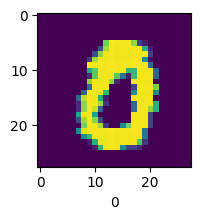

In [9]:
plot_sample(X_train, y_train, 69)

Index: 24


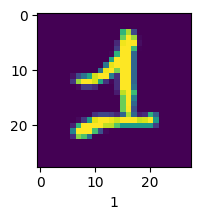

In [10]:
plot_sample(X_train, y_train, 24)

Index: 25


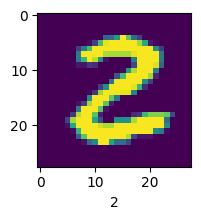

In [12]:
plot_sample(X_train, y_train, 25)

Scaling data; why divide to 255, because of the max is 255 in pixels

In [15]:
X_train = X_train / 255
X_test = X_test / 255

In [20]:
cnn = models.Sequential([

    # cnn
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 84s 43ms/step - loss: 0.1504 - accuracy: 0.9533
Epoch 2/5
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0486 - accuracy: 0.9845
Epoch 3/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0341 - accuracy: 0.9894
Epoch 4/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0263 - accuracy: 0.9916
Epoch 5/5
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0196 - accuracy: 0.9935


In [21]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0275 - accuracy: 0.9906


[0.027515411376953125, 0.9905999898910522]

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

y_pred = cnn.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_classes))

313/313 [==============================] - 5s 16ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.98      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

